In [59]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

% matplotlib inline

import seaborn as sns

pd.set_option('display.max_columns', 500)

from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.cross_validation import StratifiedKFold
from sklearn.feature_selection import VarianceThreshold
from sklearn.ensemble import VotingClassifier, GradientBoostingClassifier, BaggingClassifier, RandomForestClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.tree import ExtraTreeClassifier
from sklearn.decomposition import PCA

from sklearn.metrics import f1_score
from sklearn.manifold import TSNE

import requests

import lightgbm as lgb


#### Cписок полей:
```
* id 'id'
* wb 'wb'
* razdel 'razdel'
* source_type 'тип источника'
* offer_type 'тип предложения'
* region 'регион'
* town 'населенный пункт'
* district 'район'
* street 'улица'
* house 'дом'
* object 'объект'
* object_purpose 'назначение объекта'
* land_plot_area 'площадь земельного участка'
* land_plot_area_unit   'единица измерения площади земельного участка'
* common_area 'площадь общая'
* offer_price 'стоимость предложения'
* offer_price_unit   'единица измерения стоимости предложения (за объект за метр)'
* walls_material 'материал стен'
* number_of_rooms 'количество комнат'
* object_floor 'этаж объекта предложения'
* object_number_of_floors 'этажность здания'
* object_separate_entrance 'отдельный вход объекта предложения'
* object_placement_line  'локальное месторасположение объекта предложения (линия)'
* comment 'комментарий'
* creation_date 'дата создания'
* update_date 'дата редактирования'
* agency_name 'название агентства'
* agency_phone 'контактный телефон агентства'
* price_rub_m_sq 'цена руб./кв.м'
* uid 'uid'
* longitude 'геокоординаты долгота'
* latitude 'геокоординаты широта'
* object_type 'тип объекта'
* page_link 'ссылка на страницу'
* additional 'дополнительно'
* upload_date 'дата загрузки'
* update_date2 'дата обновления'
* relevance 'актуальность'
* geoimp 'geoimp'
* geo 'geodate'
* hide 'hide'
* del 'del'
* adrmade 'adrMade'
* adrid 'adrId'
* main_photo 'фото основное'
* photos 'фотографии'
* material 'material'
* common_floor 'этаж исходный'
* erior_finish 'внутренняя отделка'
* level 'level'
* entrance 'entrance'
* communal_payments 'коммунальные платежи'
* plot_common_area 'площадь участка исходная'
* plzemkvmbig 'plzemkvm'
* price_meter_unit 'ед. измерения цены за кв.м'
* common_price 'стоимость исходная'
* common_price_m_sq 'цена кв.м исходная'
* electricity 'электричество'
* gasification 'газоснабжение'
* water_supply 'водоснабжение'
* canalization 'канализация'
* heating 'отопление'
* building_type 'тип здания'
* build_year 'год постройки'
* ceiling_height 'высота потолков'
* parking 'парковка'
* glass 'витринное остекление'
* common_measure_unit 'ед. измерения стоимости исходная'
* common_measure_unit2 'ед. измерения цены исходная'
* sumy 'sumY'
* summ 'sumM'
* sumkvy 'sumkvY'
* sumkvm 'sumkvM'
* security 'security'
* clusterid 'clusterid'
* segment 'сегмент'
* object_class_fixed  'класс объекта (A, A++,B,C)'
```


In [60]:
df = pd.read_csv('train_task1.csv')

/Users/endnikita/projects/ml_env/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (47,51,66) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [61]:
# df.head()

In [62]:
df_test = pd.read_csv('test_task1.csv')

/Users/endnikita/projects/ml_env/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (66) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [63]:
df_test.shape

(15639, 77)

In [64]:
df = pd.concat((df, df_test), ignore_index = True)

In [65]:
# df[df.object_class_fixed.isnull()]

In [66]:
df.isnull().sum() 

id                              0
wb                              0
razdel                          0
source_type                     0
offer_type                      0
region                          0
town                        51016
district                    39453
street                        449
house                       46759
object                          0
object_purpose              38715
land_plot_area              47177
land_plot_area_unit         47177
common_area                     0
offer_price                     0
offer_price_unit            24878
walls_material              48857
number_of_rooms             50575
object_floor                12397
object_number_of_floors      2301
object_separate_entrance    46750
object_placement_line       51668
comment                         0
creation_date                5666
update_date                 50916
agency_name                   900
agency_phone                17654
price_rub_m_sq                  0
uid           

In [67]:
df['common_price'] = df.common_price.apply(lambda x: ''.join([e for e in x.split(' ') if e.isdigit()]) if isinstance(x, str) else x)

df['common_floor'] = df.common_floor.apply(lambda x: ''.join([e for e in x.split(' ') if e.isdigit()]) if isinstance(x, str) else x)
df.loc[df['common_floor'] == '', 'common_floor'] = np.float('nan')
df['common_floor'] = df.common_floor.str.replace(',', '.').astype(np.float)

df['common_price_m_sq'] = df.common_price_m_sq.apply(lambda x: ''.join([e for e in x.split(' ') if e.isdigit()]) if isinstance(x, str) else x)
df['plot_common_area'] = df.plot_common_area.apply(lambda x: ''.join([e for e in x.split(' ') if e.isdigit()]) if isinstance(x, str) else x)
df['build_year'] = df.build_year.apply(lambda x: ''.join([e for e in x.split(' ') if e.isdigit()]) if isinstance(x, str) else x)

In [68]:
df['ceiling_height'] = df.ceiling_height.apply(
    lambda x: 
    ''.join(
        [e for e in x.replace(',', '.').split(' ') if e.isdigit()]
    )
    if isinstance(x, str)
    else x
)

In [69]:
df.loc[df.offer_price_unit == 'руб. в год', 'offer_price_unit'] = df.offer_price.str.replace(',', '.').astype(np.float) / 12

In [70]:
# first of all fill missing values
missed_cat = ['number_of_rooms', 'object_floor', 'object_number_of_floors',
              'creation_date', 'agency_name', 'agency_phone', 
             'common_floor', 'clusterid', 'level', 'street', 'district',
              'main_photo', 'photos', 'erior_finish', 'parking', 'heating']
for i in missed_cat:
    df[i].fillna(df[i].value_counts().index[0], inplace = True)

In [71]:
df['sumkvm'] = df['sumkvm'].str.replace(',', '.').astype(float)

In [72]:
df.loc[df['ceiling_height'] == '', 'ceiling_height'] = np.float('nan')
df.loc[df['plot_common_area'] == '', 'plot_common_area'] = np.float('nan')

In [73]:
df['ceiling_height'] = df['ceiling_height'].astype(np.float)
df['plot_common_area'] = df['plot_common_area'].astype(np.float)

In [74]:
df['summ'] = df.summ.str.replace(',', '.').astype(np.float)

In [75]:
df.loc[df['build_year'] == '', 'build_year'] = np.float('nan')
df['build_year'] = df.build_year.str.replace(',', '.').astype(np.float)

In [76]:
df['common_price'] = df.common_price.str.replace(',', '.').astype(np.float)

In [77]:
df['common_price_m_sq'] = df.common_price_m_sq.replace(',', '.').astype(np.float)
df['land_plot_area'] = df.land_plot_area.str.replace(',', '').astype(np.float)

In [78]:
df.loc[df.land_plot_area_unit == 'сотка', 'land_plot_area'] = df.land_plot_area / 100

In [79]:
mean_missed_cat = ['sumkvm', 'summ', 'ceiling_height', 'plot_common_area', 'plzemkvmbig', 'land_plot_area',
                   'common_price', 'common_price_m_sq', 'ceiling_height', 'build_year']
for i in mean_missed_cat:
    print(i)
    df[i].fillna(df[i].mean(), inplace = True)

sumkvm
summ
ceiling_height
plot_common_area
plzemkvmbig
land_plot_area
common_price
common_price_m_sq
ceiling_height
build_year


In [80]:
# чтобы не было оферфита, а то всего 9 позиций известно
df.drop(['communal_payments'], axis=1, inplace=True)

df.drop(['common_measure_unit2', 'object_placement_line', 'del', 'additional', 'object_purpose',
         'offer_price_unit', 'price_meter_unit', 'photos', 'main_photo', 'page_link', 'uid',
         'common_measure_unit', 'walls_material', 'update_date', 'geo', 'land_plot_area_unit', 'house',
         'entrance', 'security', 'water_supply', 'material', 'canalization', 'object_separate_entrance', 
         'gasification', 'glass', 'electricity', 'town', 'object_placement_line'], axis=1, inplace=True)

In [81]:
category_object_class_fixed = df.object_class_fixed

In [82]:
mapping_target = {
    'A': 0,
    'A+': 1,
    'B': 2,
    'C': 3
}

In [83]:
df['target'] = df.object_class_fixed.astype('category').cat.codes
# df.drop(['object_class_fixed'], axis=1, inplace=True)

In [84]:
df.columns

Index(['id', 'wb', 'razdel', 'source_type', 'offer_type', 'region', 'district',
       'street', 'object', 'land_plot_area', 'common_area', 'offer_price',
       'number_of_rooms', 'object_floor', 'object_number_of_floors', 'comment',
       'creation_date', 'agency_name', 'agency_phone', 'price_rub_m_sq',
       'longitude', 'latitude', 'object_type', 'upload_date', 'update_date2',
       'relevance', 'geoimp', 'hide', 'adrmade', 'adrid', 'common_floor',
       'erior_finish', 'level', 'plot_common_area', 'plzemkvmbig',
       'common_price', 'common_price_m_sq', 'heating', 'building_type_fixed',
       'build_year', 'ceiling_height', 'parking', 'sumy', 'summ', 'sumkvy',
       'sumkvm', 'clusterid', 'segment', 'object_class_fixed', 'target'],
      dtype='object')

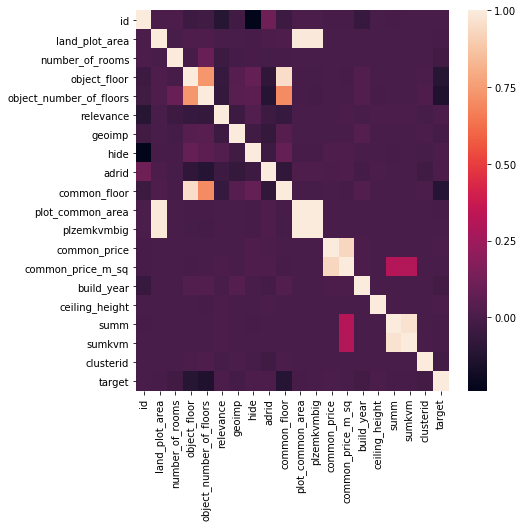

In [85]:
corr = df.corr()

fig, ax = plt.subplots(figsize=(7, 7))  
sns.heatmap(
    corr, 
    xticklabels=corr.columns.values,
    yticklabels=corr.columns.values
)

In [86]:
df['razdel'] = LabelEncoder().fit_transform(df['razdel'].astype(str))

In [87]:
df.wb.unique()

array(['МБ_realty.dmir.ru_(ком_зем)Москва.csv', 'МБ_irr.ru_(ком_зем).csv',
       'МБ_office.realty-guide.ru_Все.csv',
       'УБ_realty.dmir.ru_(ком_зем)Свердловская область.csv',
       'РФ_realtymag.ru_(ком_зем).csv',
       'СРБ_realty.dmir.ru_(ком_зем)МосковскаяОбл.csv',
       'МБ_kre.ru_(ком_зем)(продажа)Москва.csv',
       'СРБ_mosr.ru_(ком_зем)Москва и МО.csv',
       'МБ_office.realty-guide.ru.csv', 'УБ_irr.ru_(ком_зем).csv',
       'ВВБ_realty.dmir.ru_(ком_зем)Нижегородская область.csv',
       'ВВБ_irr.ru_(ком_зем).csv',
       'СРБ_gde.ru_(ком_зем)_МосковскаяОбл.csv',
       'СРБ_beboss.ru_Коммерческая(все).csv',
       'УБ_beboss.ru_Коммерческая(все)СвердловскаяОбл.csv',
       'ВВБ_beboss.ru_Коммерческая(все).csv',
       'МБ_kre.ru_(аренда_коммерческая)Москва.csv'], dtype=object)

In [88]:
df.source_type.unique()

array(['realty.dmir.ru', 'irr.ru', 'realty-guide.ru', 'realtymag.ru',
       'kre.ru', 'mosr.ru', 'gde.ru', 'beboss.ru'], dtype=object)

In [89]:
# df['source_type'] = LabelEncoder().fit_transform(df['source_type'].astype(str))

In [90]:
df.describe(include=['object', 'bool'])

,wb,source_type,offer_type,region,district,street,object,common_area,offer_price,comment,creation_date,agency_name,agency_phone,price_rub_m_sq,longitude,latitude,object_type,upload_date,update_date2,relevance,adrmade,erior_finish,level,heating,building_type_fixed,parking,sumy,sumkvy,segment,object_class_fixed
count,52129,52129,52129,52129,52129,52129,52129,52129,52129,52129,52129,52129,52129,52129,52129,52129,52129,52129,52129,52129,52129,52129,52129,52129,52129,52129,52129,52129,52129,36490
unique,17,8,588,4,235,10948,10207,6108,16010,40878,271,1526,4119,4459,7536,7583,2,152,24,2,11388,21,7,8,363,436,27568,10639,1,4
top,МБ_realty.dmir.ru_(ком_зем)Москва.csv,realty.dmir.ru,Аренда коммерческой недвижимости,Москва,Даниловский,"Москва, м. Выставочная, набережная Пресненская...",офис,0,0,Предлагается офисная площадь от собственника,2017-10-29,ООО «Комрент»,+7 (495) 648-62-84,0,"37,5408290000","55,7482500000",Офисное помещение,2017-10-14,2017-10-29,True,"Москва, м. Выставочная, набережная Пресненская...",Ремонт: типовой,3+ этаж,центральное,не задан,наземная,0,12000,Офисные,B
freq,31802,33046,12961,50150,40333,814,4430,839,22910,1012,13661,11519,19824,23681,544,543,50511,7949,24062,30355,365,44961,36863,44995,17241,48093,278,2180,52129,25416


# что-то про ресерч гео

In [91]:
df.region.value_counts()

Москва                   50150
Московская область        1262
Свердловская область       445
Нижегородская область      272
Name: region, dtype: int64

In [92]:
df.street.isnull().sum(), df.street.value_counts()

(0,
 Москва, м. Выставочная, набережная Пресненская, 6с2                            814
 Бутлерова, улица                                                               217
 Москва, м. Выставочная, набережная Пресненская, 12                             217
 Москва, м. Калужская, улица Бутлерова, 17                                      188
 Москва, м. Международная, набережная Пресненская, 12                           171
 Москва, м. Автозаводская, улица Ленинская Слобода, 19                          171
 Москва, м. Калужская, Научный проезд, 19                                       161
 Москва, м. Калужская, Научный проезд, 17                                       158
 Москва, м. Калужская, улица Обручева, 23к3                                     152
 Москва, Ленинская Слобода ул, 26                                               134
 Москва, м. Выставочная, набережная Пресненская, 8с1                            132
 Москва, Ленинская Слобода ул, 19                                       

In [93]:
df.columns

Index(['id', 'wb', 'razdel', 'source_type', 'offer_type', 'region', 'district',
       'street', 'object', 'land_plot_area', 'common_area', 'offer_price',
       'number_of_rooms', 'object_floor', 'object_number_of_floors', 'comment',
       'creation_date', 'agency_name', 'agency_phone', 'price_rub_m_sq',
       'longitude', 'latitude', 'object_type', 'upload_date', 'update_date2',
       'relevance', 'geoimp', 'hide', 'adrmade', 'adrid', 'common_floor',
       'erior_finish', 'level', 'plot_common_area', 'plzemkvmbig',
       'common_price', 'common_price_m_sq', 'heating', 'building_type_fixed',
       'build_year', 'ceiling_height', 'parking', 'sumy', 'summ', 'sumkvy',
       'sumkvm', 'clusterid', 'segment', 'object_class_fixed', 'target'],
      dtype='object')

* geoimp 'geoimp'
* geo 'geodate'

In [94]:
# хз знает что это 
df.geoimp.value_counts()

1    50888
0     1241
Name: geoimp, dtype: int64

In [95]:
label_cat = ['wb', 'source_type', 'offer_type', 'region', 'district', 'street', 'object', 'parking', 'agency_phone', 
             'segment', 'building_type_fixed', 'heating', 'level', 'erior_finish', 'adrmade', 'object_type', 'comment', 'agency_name', ]
for i in label_cat:
    df[i] = LabelEncoder().fit_transform(df[i].astype(str))

In [96]:
replace_cat = ['common_area', 'offer_price', 'price_rub_m_sq',
               'longitude', 'latitude', 'sumy', 'sumkvy']
for i in replace_cat:
    print(i)
    df[i] = df[i].str.replace(',', '.').astype(np.float)

common_area
offer_price
price_rub_m_sq
longitude
latitude
sumy
sumkvy


In [97]:
date_cat = ['creation_date', 'upload_date', 'update_date2']
for i in date_cat:
    df[i] = pd.DatetimeIndex(df[i]).astype(np.int64)/1000000

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52129 entries, 0 to 52128
Data columns (total 50 columns):
id                         52129 non-null int64
wb                         52129 non-null int64
razdel                     52129 non-null int64
source_type                52129 non-null int64
offer_type                 52129 non-null int64
region                     52129 non-null int64
district                   52129 non-null int64
street                     52129 non-null int64
object                     52129 non-null int64
land_plot_area             52129 non-null float64
common_area                52129 non-null float64
offer_price                52129 non-null float64
number_of_rooms            52129 non-null float64
object_floor               52129 non-null float64
object_number_of_floors    52129 non-null float64
comment                    52129 non-null int64
creation_date              52129 non-null float64
agency_name                52129 non-null int64
agency_phone 

In [99]:
df[df.isnull().any(axis=1)]

,id,wb,razdel,source_type,offer_type,region,district,street,object,land_plot_area,common_area,offer_price,number_of_rooms,object_floor,object_number_of_floors,comment,creation_date,agency_name,agency_phone,price_rub_m_sq,longitude,latitude,object_type,upload_date,update_date2,relevance,geoimp,hide,adrmade,adrid,common_floor,erior_finish,level,plot_common_area,plzemkvmbig,common_price,common_price_m_sq,heating,building_type_fixed,build_year,ceiling_height,parking,sumy,summ,sumkvy,sumkvm,clusterid,segment,object_class_fixed,target
36490,45410558,3,0,2,141,0,45,2148,217,62.780636,1173.00,3195056.00,1.0,2.0,2.0,7523,1.509062e+12,1105,386,0.00,37.635566,55.743411,1,1.507939e+12,1.509235e+12,True,1,0,2207,483661.0,2.0,5,6,60.107315,302793.951939,3.195056e+06,75791.559618,7,212,1993.729818,12.310502,90,3.834067e+07,3.195056e+06,32685.99,2723.830000,749.0,0,NaN,-1
36491,43780787,16,1,6,577,3,37,10586,3081,5.000000,697.00,30600000.00,1.0,4.0,13.0,32814,1.508198e+12,1105,1592,0.00,60.621891,56.834062,1,1.507334e+12,1.508458e+12,True,1,0,10764,3894834.0,4.0,5,6,60.107315,5000.000000,3.060000e+07,75791.559618,7,81,1993.729818,3.000000,90,3.060000e+07,2.631948e+06,43902.44,2779.551438,331.0,0,NaN,-1
36492,45415164,3,0,2,141,0,162,959,46,62.780636,100.00,100000.00,1.0,2.0,2.0,1388,1.509235e+12,1105,386,0.00,37.620501,55.627656,1,1.507939e+12,1.509235e+12,True,1,0,603,463984.0,2.0,5,6,60.107315,302793.951939,1.000000e+05,75791.559618,7,212,1993.729818,12.310502,90,1.200000e+06,1.000000e+05,12000.00,1000.000000,749.0,0,NaN,-1
36493,45600788,8,0,6,142,0,37,5236,5977,62.780636,52.00,0.00,1.0,1.0,7.0,36371,1.508803e+12,1413,929,1347.00,37.673951,55.774634,1,1.508026e+12,1.509235e+12,True,1,0,5612,476229.0,1.0,5,4,60.107315,302793.951939,2.845480e+08,1347.000000,7,223,1993.729818,12.310502,90,8.405280e+05,7.004400e+04,16164.00,1347.000000,749.0,0,NaN,-1
36494,34024399,7,1,5,587,0,37,173,10206,62.780636,179.00,30609000.00,1.0,4.0,4.0,16907,1.509235e+12,281,386,171000.00,37.540637,55.649971,1,1.501027e+12,1.508371e+12,True,1,1,557,60449.0,4.0,5,6,60.107315,302793.951939,3.060900e+07,171000.000000,7,73,1993.729818,12.310502,396,3.060900e+07,2.631948e+06,171000.00,2779.551438,749.0,0,NaN,-1
36495,46046427,3,0,2,141,1,37,10215,457,62.780636,15.00,18125.00,1.0,4.0,4.0,2,1.508544e+12,166,386,0.00,37.727267,55.911080,1,1.508544e+12,1.508544e+12,False,1,0,10168,4655620.0,4.0,5,6,60.107315,302793.951939,1.812500e+04,75791.559618,7,212,2017.000000,12.310502,90,2.175000e+05,1.812500e+04,14500.00,1208.330000,761.0,0,NaN,-1
36496,47342381,3,0,2,141,0,144,2117,311,62.780636,1299.00,1190750.00,1.0,2.0,1.0,8861,1.509235e+12,1105,386,0.00,37.713503,55.726056,1,1.509235e+12,1.509235e+12,True,1,0,2168,483329.0,2.0,5,6,60.107315,302793.951939,1.190750e+06,75791.559618,7,212,1993.729818,12.310502,90,1.428900e+07,1.190750e+06,11000.00,916.670000,749.0,0,NaN,-1
36497,3327250,7,0,5,365,0,37,99,10206,62.780636,74.50,74500.00,1.0,4.0,5.0,34894,1.509235e+12,281,386,12000.00,37.581911,55.868346,1,1.475021e+12,1.508371e+12,True,1,0,331,59191.0,4.0,9,6,60.107315,302793.951939,7.450000e+04,12000.000000,7,193,1993.729818,12.310502,368,8.940000e+05,7.450000e+04,12000.00,1000.000000,749.0,0,NaN,-1
36498,43098066,8,0,6,289,0,37,7124,7696,62.780636,1445.30,5058725.00,1.0,2.0,8.0,25450,1.506643e+12,155,386,0.00,37.621444,55.736579,1,1.506816e+12,1.506816e+12,False,1,0,7500,67486.0,2.0,5,5,60.107315,302793.951939,5.058725e+06,75791.559618,7,81,1993.729818,12.310502,90,6.070470e+07,5.058725e+06,42001.45,3500.120000,749.0,0,NaN,-1
36499,39864735,8,0,6,263,0,37,6326,6966,62.780636,600.00,0.00,1.0,2.0,2.0,14335,1.507680e+12,251,355,33898.00,37.629502,55.743385,1,1.505002e+12,1.508630e+12,False,1,0,6702,1280642.0,2.0,5,5,60.107315,302793.951939,2.845480e+08,33898.000000,7,358,1993.729818,12.310502,90,2.033880e+07,1.694900e+06,33898.00,2824.830000,749.0,0,NaN,-1


In [39]:
df.to_csv('prepared_data_v1.csv')

# COOL FEATURE - ADDITIONAL

In [100]:
def _parse(d, path, i=0):

    if isinstance(path, str):
        path = path.split(':')

    if i == len(path):
        return d

    for j in range(len(path)):
        if path[i + j].isdigit():
            path[i + j] = int(path[i + j])

        d = d[path[i + j]]
        return _parse(d, path, i=i+1)

def parse(d, path):

    try:
        return _parse(d, path)
    except Exception as e:
        print('some error during path travesing: {}'.format(e))
        return None

In [101]:
df.columns

Index(['id', 'wb', 'razdel', 'source_type', 'offer_type', 'region', 'district',
       'street', 'object', 'land_plot_area', 'common_area', 'offer_price',
       'number_of_rooms', 'object_floor', 'object_number_of_floors', 'comment',
       'creation_date', 'agency_name', 'agency_phone', 'price_rub_m_sq',
       'longitude', 'latitude', 'object_type', 'upload_date', 'update_date2',
       'relevance', 'geoimp', 'hide', 'adrmade', 'adrid', 'common_floor',
       'erior_finish', 'level', 'plot_common_area', 'plzemkvmbig',
       'common_price', 'common_price_m_sq', 'heating', 'building_type_fixed',
       'build_year', 'ceiling_height', 'parking', 'sumy', 'summ', 'sumkvy',
       'sumkvm', 'clusterid', 'segment', 'object_class_fixed', 'target'],
      dtype='object')

In [102]:
df['geocodenew'] = df[['longitude', 'latitude']].apply(lambda x: ','.join(x.astype(str)), axis=1)

df['kind'] = 'house'
df['postal_code'] = 0
df['country'] = 0
df['province'] = 0
df['province2'] = 0
df['locality'] = 0
df['street'] = 0
df['house'] = 0

In [ ]:
for i, row in df[['geocodenew']].iterrows():
    if i % 500 == 0:
        print(row)
    if i < 22000:
        continue
    r = requests.get('https://geocode-maps.yandex.ru/1.x/?geocode={}&format=json'.format(row['geocodenew'])).json()
    df.loc[i, 'kind'] = parse(r, path='response:GeoObjectCollection:featureMember:0:GeoObject:metaDataProperty:GeocoderMetaData:kind')
    df.loc[i, 'postal_code'] = parse(r, path='response:GeoObjectCollection:featureMember:0:GeoObject:metaDataProperty:GeocoderMetaData:Address:postal_code')
    df.loc[i, 'country'] = parse(r, path='response:GeoObjectCollection:featureMember:0:GeoObject:metaDataProperty:GeocoderMetaData:Address:Components:0:name')
    df.loc[i, 'province'] = parse(r, path='response:GeoObjectCollection:featureMember:0:GeoObject:metaDataProperty:GeocoderMetaData:Address:Components:1:name')
    df.loc[i, 'province2'] = parse(r, path='response:GeoObjectCollection:featureMember:0:GeoObject:metaDataProperty:GeocoderMetaData:Address:Components:2:name')
    df.loc[i, 'locality'] = parse(r, path='response:GeoObjectCollection:featureMember:0:GeoObject:metaDataProperty:GeocoderMetaData:Address:Components:3:name')
    df.loc[i, 'street'] = parse(r, path='response:GeoObjectCollection:featureMember:0:GeoObject:metaDataProperty:GeocoderMetaData:Address:Components:4:name')
    df.loc[i, 'house'] = parse(r, path='response:GeoObjectCollection:featureMember:0:GeoObject:metaDataProperty:GeocoderMetaData:Address:Components:5:name')

geocodenew    37.537371,55.746593
Name: 0, dtype: object
geocodenew    37.584712,55.790464
Name: 500, dtype: object
geocodenew    37.583751,55.73625
Name: 1000, dtype: object
geocodenew    37.665506,55.751497
Name: 1500, dtype: object
geocodenew    37.447647,55.710017
Name: 2000, dtype: object
geocodenew    37.596534,55.76527
Name: 2500, dtype: object
geocodenew    37.757979,55.802786
Name: 3000, dtype: object
geocodenew    37.599247,55.745894
Name: 3500, dtype: object
geocodenew    37.832827,55.812529
Name: 4000, dtype: object
geocodenew    37.806201,55.699309
Name: 4500, dtype: object
geocodenew    37.630526,55.744318
Name: 5000, dtype: object
geocodenew    37.588045,55.683864
Name: 5500, dtype: object
geocodenew    37.610116,55.787902
Name: 6000, dtype: object
geocodenew    37.6070380211,55.7647020811
Name: 6500, dtype: object
geocodenew    37.516332,56.342256
Name: 7000, dtype: object
geocodenew    37.537083,55.749511
Name: 7500, dtype: object
geocodenew    37.653541,55.858023
Name

some error during path travesing: 'postal_code'
some error during path travesing: 'postal_code'
some error during path travesing: list index out of range
some error during path travesing: 'postal_code'
some error during path travesing: list index out of range
some error during path travesing: 'postal_code'
some error during path travesing: 'postal_code'
some error during path travesing: 'postal_code'
some error during path travesing: 'postal_code'
some error during path travesing: 'postal_code'
some error during path travesing: 'postal_code'
some error during path travesing: 'postal_code'
some error during path travesing: 'postal_code'
some error during path travesing: 'postal_code'
some error during path travesing: 'postal_code'
some error during path travesing: 'postal_code'
geocodenew    37.660521,55.785979
Name: 24000, dtype: object
some error during path travesing: 'postal_code'
some error during path travesing: 'postal_code'
some error during path travesing: 'postal_code'
some er

In [1]:
df.head()

NameError: name 'df' is not defined